In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
train_datagen=keras.preprocessing.image.ImageDataGenerator(rescale=1./255.,
                                                           horizontal_flip=True,
                                                           zoom_range=0.2,
                                                           shear_range=0.2,
                                                          rotation_range=15)
test_datagen=keras.preprocessing.image.ImageDataGenerator(rescale=1./255.)

In [3]:
train_path='Dataset//train'
test_path='Dataset//test'

In [4]:
train_data=train_datagen.flow_from_directory(train_path,target_size=(224,224),batch_size=8,shuffle=True,class_mode='categorical')
test_data=test_datagen.flow_from_directory(test_path,target_size=(224,224),batch_size=8,shuffle=False,class_mode='categorical')

Found 655 images belonging to 17 classes.
Found 183 images belonging to 17 classes.


In [5]:
train_data.class_indices

{'Darier_s disease': 0,
 'Muehrck-e_s lines': 1,
 'aloperia areata': 2,
 'beau_s lines': 3,
 'bluish nail': 4,
 'clubbing': 5,
 'eczema': 6,
 'half and half nailes (Lindsay_s nails)': 7,
 'koilonychia': 8,
 'leukonychia': 9,
 'onycholycis': 10,
 'pale nail': 11,
 'red lunula': 12,
 'splinter hemmorrage': 13,
 'terry_s nail': 14,
 'white nail': 15,
 'yellow nails': 16}

In [6]:
test_data.class_indices

{'Darier_s disease': 0,
 'Muehrck-e_s lines': 1,
 'aloperia areata': 2,
 'beau_s lines': 3,
 'bluish nail': 4,
 'clubbing': 5,
 'eczema': 6,
 'half and half nailes (Lindsay_s nails)': 7,
 'koilonychia': 8,
 'leukonychia': 9,
 'onycholycis': 10,
 'pale nail': 11,
 'red lunula': 12,
 'splinter hemmorrage': 13,
 'terry_s nail': 14,
 'white nail': 15,
 'yellow nails': 16}

In [7]:
pd.Series(train_data.classes).value_counts()

13    62
10    50
4     50
0     47
2     47
6     45
3     42
5     40
8     38
7     38
14    36
11    35
1     33
9     31
16    27
15    19
12    15
Name: count, dtype: int64

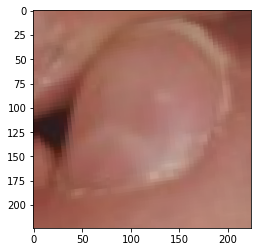

In [8]:
plt.imshow(train_data[10][0][0])
plt.show()

In [9]:
train_data[10][1][0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
      dtype=float32)

In [10]:
(train_data[10][0][0]).shape

(224, 224, 3)

In [11]:
from tensorflow.keras.applications.vgg16 import VGG16

In [12]:
vgg=VGG16(include_top=False,input_shape=(224,224,3),weights='imagenet')

In [13]:
for layer in vgg.layers:
    layer.trainable=False

In [14]:
x=keras.layers.Flatten()(vgg.output)
output_layer=keras.layers.Dense(17,activation='softmax')(x)
model=keras.Model(vgg.input,output_layer)

In [15]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [16]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [17]:
model.fit_generator(train_data,steps_per_epoch=len(train_data),epochs=100)

Epoch 1/100


C:\Users\Siddhanth\AppData\Local\Temp\ipykernel_10036\1681972780.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_data,steps_per_epoch=len(train_data),epochs=100)


82/82 [==============================] - 10s 77ms/step - loss: 3.5104 - accuracy: 0.1099
Epoch 2/100
82/82 [==============================] - 5s 60ms/step - loss: 2.7147 - accuracy: 0.2519
Epoch 3/100
82/82 [==============================] - 5s 60ms/step - loss: 2.3635 - accuracy: 0.3542
Epoch 4/100
82/82 [==============================] - 5s 62ms/step - loss: 2.2131 - accuracy: 0.4198
Epoch 5/100
82/82 [==============================] - 5s 61ms/step - loss: 1.8821 - accuracy: 0.4809
Epoch 6/100
82/82 [==============================] - 5s 61ms/step - loss: 1.4647 - accuracy: 0.5527
Epoch 7/100
82/82 [==============================] - 5s 65ms/step - loss: 1.3930 - accuracy: 0.5771
Epoch 8/100
82/82 [==============================] - 5s 64ms/step - loss: 1.4348 - accuracy: 0.5756
Epoch 9/100
82/82 [==============================] - 5s 60ms/step - loss: 1.1756 - accuracy: 0.6580
Epoch 10/100
82/82 [==============================] - 5s 62ms/step - loss: 1.0305 - accuracy: 0.6824
Epoch 11/1

82/82 [==============================] - 6s 68ms/step - loss: 0.1516 - accuracy: 0.9496
Epoch 83/100
82/82 [==============================] - 6s 69ms/step - loss: 0.2075 - accuracy: 0.9359
Epoch 84/100
82/82 [==============================] - 6s 67ms/step - loss: 0.2302 - accuracy: 0.9282
Epoch 85/100
82/82 [==============================] - 6s 67ms/step - loss: 0.2328 - accuracy: 0.9191
Epoch 86/100
82/82 [==============================] - 5s 66ms/step - loss: 0.1854 - accuracy: 0.9618
Epoch 87/100
82/82 [==============================] - 6s 68ms/step - loss: 0.1845 - accuracy: 0.9450
Epoch 88/100
82/82 [==============================] - 6s 67ms/step - loss: 0.3653 - accuracy: 0.9038
Epoch 89/100
82/82 [==============================] - 6s 67ms/step - loss: 0.4411 - accuracy: 0.8992
Epoch 90/100
82/82 [==============================] - 6s 68ms/step - loss: 0.4241 - accuracy: 0.8840
Epoch 91/100
82/82 [==============================] - 6s 67ms/step - loss: 0.1724 - accuracy: 0.9389
Epo

In [18]:
model.evaluate(test_data)

23/23 [==============================] - 1s 41ms/step - loss: 0.0275 - accuracy: 0.9891


[0.02747969515621662, 0.9890710115432739]

In [19]:
from sklearn.metrics import confusion_matrix,classification_report
pred=model.predict(test_data)
pred=[np.argmax(i) for i in pred]

23/23 [==============================] - 1s 43ms/step


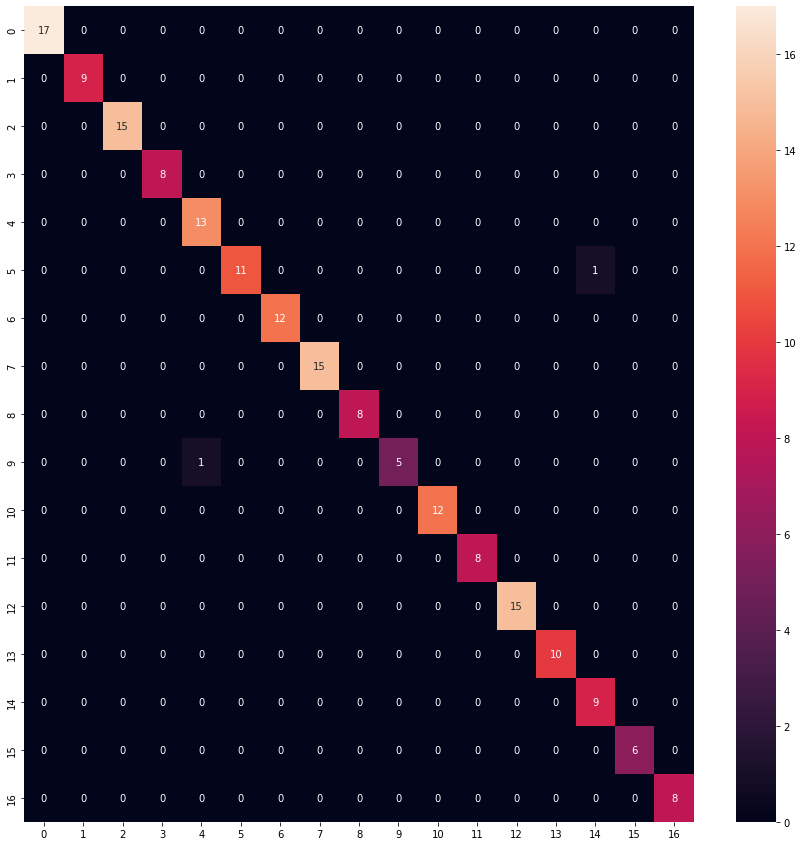

In [20]:
cm=confusion_matrix(test_data.classes,pred)
plt.figure(figsize=(15,15))
sns.heatmap(cm,annot=True)
plt.show()

In [21]:
print(classification_report(test_data.classes,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        15
           3       1.00      1.00      1.00         8
           4       0.93      1.00      0.96        13
           5       1.00      0.92      0.96        12
           6       1.00      1.00      1.00        12
           7       1.00      1.00      1.00        15
           8       1.00      1.00      1.00         8
           9       1.00      0.83      0.91         6
          10       1.00      1.00      1.00        12
          11       1.00      1.00      1.00         8
          12       1.00      1.00      1.00        15
          13       1.00      1.00      1.00        10
          14       0.90      1.00      0.95         9
          15       1.00      1.00      1.00         6
          16       1.00      1.00      1.00         8

    accuracy              

In [25]:
from tensorflow.keras.models import save_model
save_model(model,'vgg-16-nail.h5')